<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import numpy as np
import os

In [0]:
print('Loading Face detection model..............')
face_model= cv2.dnn.readNet('deploy.prototxt','res10_300x300_ssd_iter_140000.caffemodel')
print('Face detection model loading complete............')
print('Loading Face Mask detection model..............')
mask_model= load_model('mask_detector.model')
print('Face mask detection model loading complete............')

Loading Face detection model..............
Face detection model loading complete............
Loading Face Mask detection model..............
Face mask detection model loading complete............


In [0]:
from google.colab.patches import cv2_imshow

400 600


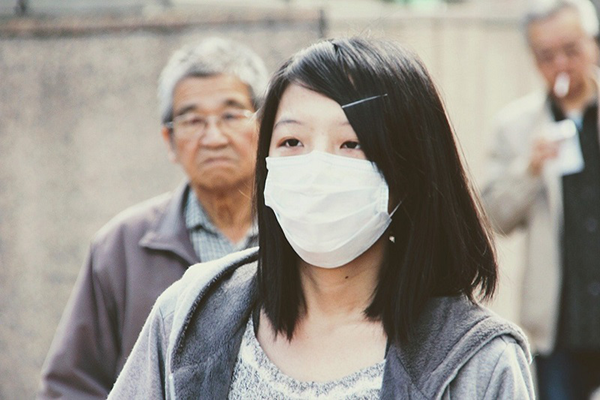

In [0]:
img = cv2.imread('example_03.png')
orig = img.copy()
(h, w) = img.shape[:2]
print(h,w)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300),(104.0, 177.0, 123.0), swapRB=True)
print("Computing face detections......")
face_model.setInput(blob)
detection = face_model.forward()
print("Face detection Complete.....")

Computing face detections......
Face detection Complete.....


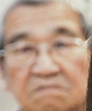

[[0.00468221 0.9953178 ]]


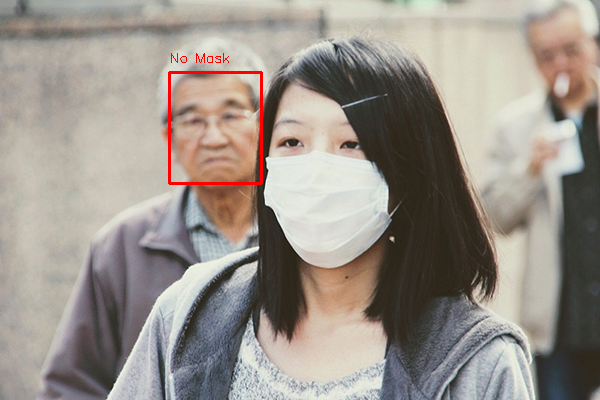

In [0]:
classify={0:'Mask', 1:'No Mask'}
for i in range(0, detection.shape[2]):
    confidence = detection[0, 0, i, 2]
    
    if confidence > 0.8:
        box = detection[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
        
        face_image = img[startY:endY, startX:endX]
        cv2_imshow( face_image)
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
        face_image = cv2.resize(face_image, (224, 224))
        face_image = img_to_array(face_image)
        face_image = preprocess_input(face_image)
        face_image = np.expand_dims(face_image, axis=0)
        image= np.vstack([face_image])
        classes = mask_model.predict(image)
        print(classes)
        label= classify[np.argmax(classes)]
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        cv2.putText(img, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color)
        cv2.rectangle(img, (startX, startY), (endX, endY), color, 2)

cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Video feed

In [0]:
cam= cv2.VideoCapture('video.mp4')
fourcc= cv2.VideoWriter_fourcc(*'XVID')
out= cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
classify={0:'Mask', 1:'No Mask'}

ret,frame= cam.read()
while ret:
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),(104.0, 177.0, 123.0), swapRB=True)
    face_model.setInput(blob)
    detection = face_model.forward()
    for i in range(0, detection.shape[2]):
        confidence = detection[0, 0, i, 2]
        
        if confidence > 0.5:
            box = detection[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            
            face_image = frame[startY:endY, startX:endX]
            face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            face_image = cv2.resize(face_image, (224, 224))
            face_image = img_to_array(face_image)
            face_image = preprocess_input(face_image)
            face_image = np.expand_dims(face_image, axis=0)
            image= np.vstack([face_image])
            classes = mask_model.predict(face_image)
            label= classify[np.argmax(classes)]
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
            cv2.putText(frame, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color)
            cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
            out.write(frame)
    
    ret,frame= cam.read()

cv2.destroyAllWindows()
cam.release()
out.release()